pip install openpyxl


In [1]:
import pandas as pd

In [2]:
excel_file = '/media/sf_share/personal/lare/lapd_ripa_raw_data_08312021_mod.xlsx'

In [3]:
raw_data = pd.read_excel(excel_file, sheet_name=None)

In [4]:
raw_data.keys()

dict_keys(['MAIN', 'Officer', 'ACTIONS TAKEN', 'BASIS FOR SEARCH', 'Reason For Stop', 'Result of Stop', 'Person', 'Perceived Race', 'Perceived Disability', 'Person Contraband Discovered ', 'Result of Stop and Race'])

In [5]:
for sheet in raw_data.keys():
    if "Stop ID" in raw_data[sheet].columns:
        print("{} \t\t{} rows  \t {} unique stops ".format(sheet, len(raw_data[sheet]), len(raw_data[sheet]["Stop ID"].unique())))

MAIN 		1425 rows  	 1425 unique stops 
ACTIONS TAKEN 		1663 rows  	 1425 unique stops 
BASIS FOR SEARCH 		1468 rows  	 1425 unique stops 
Reason For Stop 		1447 rows  	 1425 unique stops 
Result of Stop 		1519 rows  	 1425 unique stops 
Person 		1440 rows  	 1425 unique stops 
Perceived Race 		1462 rows  	 1425 unique stops 
Perceived Disability 		1443 rows  	 1425 unique stops 
Person Contraband Discovered  		1449 rows  	 1425 unique stops 
Result of Stop and Race 		1573 rows  	 1425 unique stops 


In [6]:
data = raw_data['MAIN']
sheets_to_merge=['ACTIONS TAKEN', 'BASIS FOR SEARCH', 'Reason For Stop', 
                 'Result of Stop', 'Person', 'Perceived Race', 
                 'Perceived Disability', 'Person Contraband Discovered ']
for sheet in sheets_to_merge:
    data = data.merge(raw_data[sheet], how="inner", on="Stop ID")

In [7]:
data.keys()

Index(['Stop ID', 'Stop Date Time', 'Stop Duration',
       'Stop In Response To Calls for Service', 'Street',
       'Action Taken During Stop', 'Person Search Consent Given',
       'Property Search Consent Given', 'Basis For Search', 'Reason For Stop',
       'Result Of Stop', 'Perceived Limited English', 'Perceived Age',
       'Perceived Gender', 'Gender Nonconforming', 'Perceived LGBT',
       'Perceived Race', 'Perceived Or Known Disability',
       'Contraband Or Evidence Discovered'],
      dtype='object')

In [8]:
data

,Stop ID,Stop Date Time,Stop Duration,Stop In Response To Calls for Service,Street,Action Taken During Stop,Person Search Consent Given,Property Search Consent Given,Basis For Search,Reason For Stop,Result Of Stop,Perceived Limited English,Perceived Age,Perceived Gender,Gender Nonconforming,Perceived LGBT,Perceived Race,Perceived Or Known Disability,Contraband Or Evidence Discovered
0,55,2021-02-01 10:40:33.020,10,No,Foothill Expressway,No Action,No,No,No Search,Traffic Violation,Citation for infraction,No,50,Male,No,No,White,None,None
1,56,2021-02-01 10:54:23.067,5,No,San Antonio,No Action,No,No,No Search,Traffic Violation,Warning (verbal or written),Yes,25,Female,No,No,Hispanic/Latino/a,None,None
2,57,2021-02-01 17:27:29.437,15,No,foothill exp,No Action,No,No,No Search,Traffic Violation,Warning (verbal or written),No,25,Male,No,No,Hispanic/Latino/a,None,None
3,58,2021-02-01 19:21:04.627,10,No,Plaza Central,No Action,No,No,No Search,Traffic Violation,Citation for infraction,No,45,Female,No,No,White,None,None
4,59,2021-02-01 19:27:34.940,6,No,SAN ANTONIO RD,No Action,No,No,No Search,Traffic Violation,Warning (verbal or written),No,20,Female,No,No,White,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16172,2327,2021-07-30 22:06:19.767,5,No,San Antonio,No Action,No,No,No Search,Traffic Violation,Warning (verbal or written),No,18,Female,No,No,White,None,None
16173,2328,2021-07-31 15:46:58.243,8,No,Alvarado,No Action,No,No,No Search,Traffic Violation,Contacted parent/legal guardian or other perso...,No,17,Male,No,No,White,None,None
16174,2328,2021-07-31 15:46:58.243,8,No,Alvarado,No Action,No,No,No Search,Traffic Violation,Warning (verbal or written),No,17,Male,No,No,White,None,None
16175,2329,2021-07-31 23:28:24.150,3,No,GRANT RD,No Action,No,No,No Search,Traffic Violation,Warning (verbal or written),No,20,Female,No,No,White,None,None


In [9]:
data.to_csv("test_df.csv")

In [9]:
len(data)

16177

In [10]:
len(data["Stop ID"].unique())

1425

In [11]:
data[data["Stop ID"] == 85].drop_duplicates()

,Stop ID,Stop Date Time,Stop Duration,Stop In Response To Calls for Service,Street,Action Taken During Stop,Person Search Consent Given,Property Search Consent Given,Basis For Search,Reason For Stop,Result Of Stop,Perceived Limited English,Perceived Age,Perceived Gender,Gender Nonconforming,Perceived LGBT,Perceived Race,Perceived Or Known Disability,Contraband Or Evidence Discovered
32,85,2021-02-05 15:38:50.533,25,No,Grant Road,Asked for consent to search property,No,No,No Search,Traffic Violation,In-field cite and release,No,35,Male,No,No,Hispanic/Latino/a,None,None
33,85,2021-02-05 15:38:50.533,25,No,Grant Road,Asked for consent to search property,No,No,No Search,Traffic Violation,Custodial Arrest pursuant to outstanding warrant,No,35,Male,No,No,Hispanic/Latino/a,None,None
34,85,2021-02-05 15:38:50.533,25,No,Grant Road,Person removed from vehicle by order,No,No,No Search,Traffic Violation,In-field cite and release,No,35,Male,No,No,Hispanic/Latino/a,None,None
35,85,2021-02-05 15:38:50.533,25,No,Grant Road,Person removed from vehicle by order,No,No,No Search,Traffic Violation,Custodial Arrest pursuant to outstanding warrant,No,35,Male,No,No,Hispanic/Latino/a,None,None
36,85,2021-02-05 15:38:50.533,25,No,Grant Road,Asked for consent to search person,Yes,No,No Search,Traffic Violation,In-field cite and release,No,35,Male,No,No,Hispanic/Latino/a,None,None
37,85,2021-02-05 15:38:50.533,25,No,Grant Road,Asked for consent to search person,Yes,No,No Search,Traffic Violation,Custodial Arrest pursuant to outstanding warrant,No,35,Male,No,No,Hispanic/Latino/a,None,None


In [12]:
data["Result Of Stop"].value_counts()

Warning (verbal or written)                                                  8222
No Action                                                                    3499
Citation for infraction                                                      3186
In-field cite and release                                                     592
Custodial Arrest pursuant to outstanding warrant                              363
Custodial Arrest without warrant                                              241
Field interview card completed                                                 32
Contacted parent/legal guardian or other person responsible for the minor      15
Psychiatric hold                                                               15
Noncriminal transport or caretaking transport                                  12
Name: Result Of Stop, dtype: int64

In [13]:
data["Stop ID"].value_counts()

1555    6561
1123    2560
1313     768
1157     768
1432     512
        ... 
1794       1
1786       1
1778       1
1762       1
2047       1
Name: Stop ID, Length: 1425, dtype: int64

In [14]:
data.drop_duplicates()["Stop ID"].value_counts()

2217    72
1176    48
1313    32
1432    32
2215    24
        ..
1606     1
1604     1
1602     1
1600     1
2047     1
Name: Stop ID, Length: 1425, dtype: int64

In [15]:
data[data["Stop ID"] == 2217]

,Stop ID,Stop Date Time,Stop Duration,Stop In Response To Calls for Service,Street,Action Taken During Stop,Person Search Consent Given,Property Search Consent Given,Basis For Search,Reason For Stop,Result Of Stop,Perceived Limited English,Perceived Age,Perceived Gender,Gender Nonconforming,Perceived LGBT,Perceived Race,Perceived Or Known Disability,Contraband Or Evidence Discovered
15973,2217,2021-07-18 01:21:18.450,189,No,El Monte,Curbside detention,No,No,Evidence of crime,Traffic Violation,Custodial Arrest without warrant,No,30,Female,No,No,Hispanic/Latino/a,None,Drug Paraphernalia
15974,2217,2021-07-18 01:21:18.450,189,No,El Monte,Curbside detention,No,No,Evidence of crime,Traffic Violation,Custodial Arrest without warrant,No,30,Female,No,No,Hispanic/Latino/a,None,Other Contraband or evidence
15975,2217,2021-07-18 01:21:18.450,189,No,El Monte,Curbside detention,No,No,Evidence of crime,Traffic Violation,Custodial Arrest without warrant,No,30,Female,No,No,Hispanic/Latino/a,None,Suspected Stolen property
15976,2217,2021-07-18 01:21:18.450,189,No,El Monte,Curbside detention,No,No,Evidence of crime,Traffic Violation,Custodial Arrest without warrant,No,30,Female,No,No,Hispanic/Latino/a,None,Drugs/narcotics
15977,2217,2021-07-18 01:21:18.450,189,No,El Monte,Curbside detention,No,No,Incident to arrest,Traffic Violation,Custodial Arrest without warrant,No,30,Female,No,No,Hispanic/Latino/a,None,Drug Paraphernalia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16040,2217,2021-07-18 01:21:18.450,189,No,El Monte,Search of property was conducted,No,No,Incident to arrest,Traffic Violation,Custodial Arrest without warrant,No,30,Female,No,No,Hispanic/Latino/a,None,Drugs/narcotics
16041,2217,2021-07-18 01:21:18.450,189,No,El Monte,Search of property was conducted,No,No,Vehicle inventory,Traffic Violation,Custodial Arrest without warrant,No,30,Female,No,No,Hispanic/Latino/a,None,Drug Paraphernalia
16042,2217,2021-07-18 01:21:18.450,189,No,El Monte,Search of property was conducted,No,No,Vehicle inventory,Traffic Violation,Custodial Arrest without warrant,No,30,Female,No,No,Hispanic/Latino/a,None,Other Contraband or evidence
16043,2217,2021-07-18 01:21:18.450,189,No,El Monte,Search of property was conducted,No,No,Vehicle inventory,Traffic Violation,Custodial Arrest without warrant,No,30,Female,No,No,Hispanic/Latino/a,None,Suspected Stolen property


In [16]:
data["Reason For Stop"].unique()

array(['Traffic Violation', 'Consensual Encounter resulting in a search',
       'Reasonable Suspicion',
       'Investigation to determine whether the person was truant',
       'Knowledge of outstanding arrest warrant/wanted person',
       'Known to be on Parole / Probation / PRCS / Mandatory Supervision'],
      dtype=object)

In [17]:
data["Contraband Or Evidence Discovered"].unique()

array(['None', 'Drug Paraphernalia', 'Drugs/narcotics',
       'Other Contraband or evidence', 'Alcohol',
       'Suspected Stolen property', 'Weapon(s) other than a firearm',
       'Cell phone(s) or electronic device(s)', 'Money'], dtype=object)

In [37]:
uniq_stop_ids = data["Stop ID"].unique()

In [42]:
uniq_stop_ids = set(uniq_stop_ids)

In [52]:
uniq_data = data.drop_duplicates(subset="Stop ID")

In [53]:
len(uniq_data)

1425

In [54]:
uniq_data

,Stop ID,Stop Date Time,Stop Duration,Stop In Response To Calls for Service,Street,Action Taken During Stop,Person Search Consent Given,Property Search Consent Given,Basis For Search,Reason For Stop,Result Of Stop,Perceived Limited English,Perceived Age,Perceived Gender,Gender Nonconforming,Perceived LGBT,Perceived Race,Perceived Or Known Disability,Contraband Or Evidence Discovered
0,55,2021-02-01 10:40:33.020,10,No,Foothill Expressway,No Action,No,No,No Search,Traffic Violation,Citation for infraction,No,50,Male,No,No,White,None,None
1,56,2021-02-01 10:54:23.067,5,No,San Antonio,No Action,No,No,No Search,Traffic Violation,Warning (verbal or written),Yes,25,Female,No,No,Hispanic/Latino/a,None,None
2,57,2021-02-01 17:27:29.437,15,No,foothill exp,No Action,No,No,No Search,Traffic Violation,Warning (verbal or written),No,25,Male,No,No,Hispanic/Latino/a,None,None
3,58,2021-02-01 19:21:04.627,10,No,Plaza Central,No Action,No,No,No Search,Traffic Violation,Citation for infraction,No,45,Female,No,No,White,None,None
4,59,2021-02-01 19:27:34.940,6,No,SAN ANTONIO RD,No Action,No,No,No Search,Traffic Violation,Warning (verbal or written),No,20,Female,No,No,White,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16171,2326,2021-07-30 19:25:47.577,10,No,FOOTHILL EXP,No Action,No,No,No Search,Traffic Violation,Citation for infraction,No,65,Female,No,No,Asian,None,None
16172,2327,2021-07-30 22:06:19.767,5,No,San Antonio,No Action,No,No,No Search,Traffic Violation,Warning (verbal or written),No,18,Female,No,No,White,None,None
16173,2328,2021-07-31 15:46:58.243,8,No,Alvarado,No Action,No,No,No Search,Traffic Violation,Contacted parent/legal guardian or other perso...,No,17,Male,No,No,White,None,None
16175,2329,2021-07-31 23:28:24.150,3,No,GRANT RD,No Action,No,No,No Search,Traffic Violation,Warning (verbal or written),No,20,Female,No,No,White,None,None


array([[<AxesSubplot:title={'center':'Stop Duration'}>]], dtype=object)

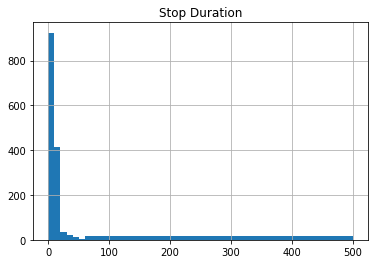

In [57]:
uniq_data.hist(column = "Stop Duration", bins = [0, 10, 20, 30, 40, 50, 60, 500])

In [58]:
datetimes = uniq_data["Stop Date Time"]

In [64]:
datetimes[0].hour

10

(array([ 33.,  24.,  17.,  29.,  20.,  20.,   7.,  33.,  77., 133., 140.,
        110.,  68.,  83., 117., 137.,  65.,  25.,  19.,  79.,  82.,  50.,
         31.,  26.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

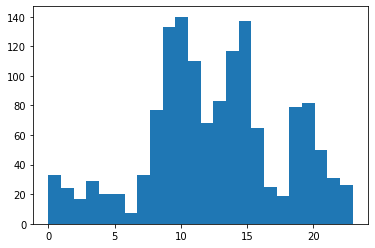

In [73]:
matplotlib.pyplot.hist([x.hour for x in datetimes], bins=24)

(array([228., 278., 280., 219., 216., 204.]),
 array([2.        , 2.83333333, 3.66666667, 4.5       , 5.33333333,
        6.16666667, 7.        ]),
 <BarContainer object of 6 artists>)

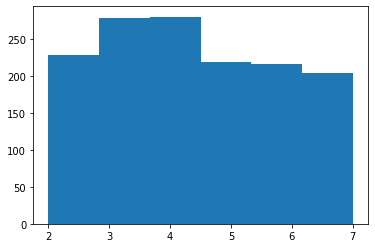

In [76]:
matplotlib.pyplot.hist([x.month for x in datetimes], bins=6)

(array([114., 156., 129., 139., 174., 134., 145., 143., 155., 136.]),
 array([ 0. ,  5.9, 11.8, 17.7, 23.6, 29.5, 35.4, 41.3, 47.2, 53.1, 59. ]),
 <BarContainer object of 10 artists>)

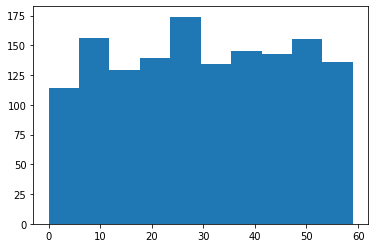

In [77]:
matplotlib.pyplot.hist([x.minute for x in datetimes], bins=10)

array([[<AxesSubplot:title={'center':'Perceived Age'}>]], dtype=object)

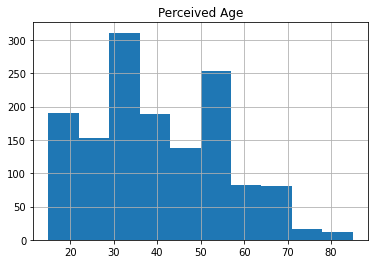

In [74]:
uniq_data.hist(column = "Perceived Age")

In [78]:
data["Result Of Stop"].unique()

array(['Citation for infraction', 'Warning (verbal or written)',
       'No Action', 'In-field cite and release',
       'Custodial Arrest pursuant to outstanding warrant',
       'Field interview card completed',
       'Custodial Arrest without warrant', 'Psychiatric hold',
       'Contacted parent/legal guardian or other person responsible for the minor',
       'Noncriminal transport or caretaking transport'], dtype=object)

<AxesSubplot:>

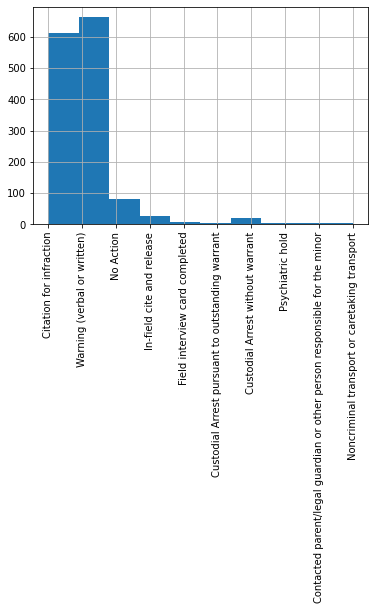

In [82]:
uniq_data["Result Of Stop"].hist(xrot=90)

<AxesSubplot:>

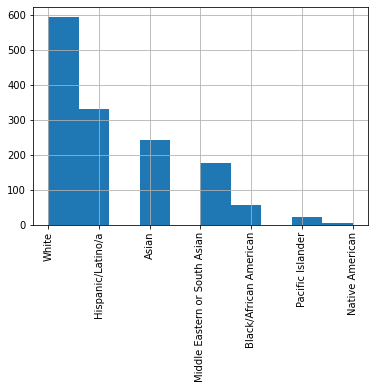

In [83]:
uniq_data["Perceived Race"].hist(xrot=90)

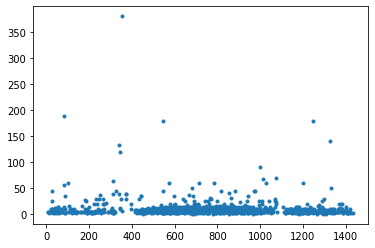

In [89]:
matplotlib.pyplot.plot([(x.hour*60 + x.minute) for x in datetimes], uniq_data["Stop Duration"], '.')

In [91]:
uniq_data.groupby("Perceived Race").mean("Stop Duration")

,Stop ID,Stop Duration,Perceived Age
Perceived Race,,,
Asian,1573.879668,7.767635,40.887967
Black/African American,1557.607143,14.178571,36.464286
Hispanic/Latino/a,1532.133333,10.906061,34.942424
Middle Eastern or South Asian,1661.457627,11.435028,38.937853
Native American,1884.400000,21.600000,59.000000
Pacific Islander,1648.173913,9.043478,38.086957
White,1535.263069,9.445194,42.655987


In [92]:
14.178/9.445

1.5011116993118052

In [109]:
set([str(x).lower().replace("avenue","").replace("ave", "").replace("rd","").strip() for x in uniq_data["Street"].unique()])

{'1 north san antonio',
 '100',
 '1st st',
 '1st street',
 '85',
 'alba ct.',
 'alicia',
 'almond',
 'almond abe',
 'altos oaks',
 'alvarado',
 'amber ln',
 'april lane',
 'april ln',
 'arastradero',
 'arastradero blvd',
 'arboleda',
 'arboretum',
 'at joseph',
 'bay tree ln',
 'bellvue',
 'berry',
 'beverly',
 'bryant',
 'campbell',
 'casita',
 'casita way',
 'castro st',
 'cedar pl',
 'cesano ct.',
 'chester',
 'christina dr',
 'clinton',
 'covington',
 'covington road',
 'crist',
 'crist dr',
 'cuesta',
 'cuesta dr',
 'cuesta drive',
 'del medio',
 'deodara',
 'deodara dr',
 'deodara drive',
 'distel',
 'distel dr',
 'dolores',
 'e edith',
 'e portola',
 'e. portola',
 'ecr',
 'edith',
 'el camino',
 'el camino real',
 'el camino reap',
 'el monte',
 'el monte av',
 'escuela',
 'eunice',
 'evemarie',
 'fallen leaf',
 'fallen leaf lane',
 'farndon',
 'fayette',
 'filip',
 'first',
 'first st',
 'first street',
 'fooothill',
 'foot hill exp',
 'foothill',
 'foothill exp',
 'foothill e

In [100]:
str(5)

'5'

Check for incompatible dummy variables!